<a href="https://colab.research.google.com/github/Mikeike34/MLA_MJC/blob/main/MLA5_MJC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<u> Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#<u> Imports for Specific Models

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#<u>Other Classifiers

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#<u> Imports for Splitting Data and Building Pipeline

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [6]:
from sklearn import set_config
set_config(display='diagram')

#<u> Imports for Performance Measures

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#<u> Confusion Matrix Function

In [8]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#<u> Aquire Data

In [10]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

#<u> Statistics and Visual Exploration

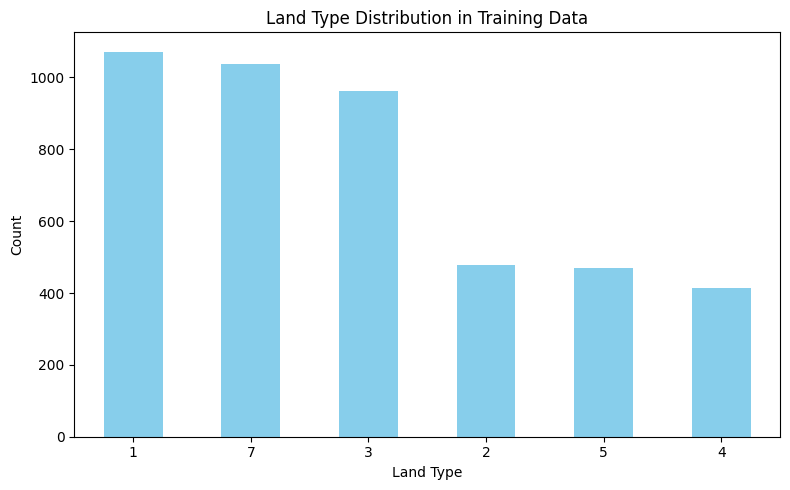

In [17]:
plt.figure(figsize=(8, 5))
landsat_train['land_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Land Type Distribution in Training Data')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

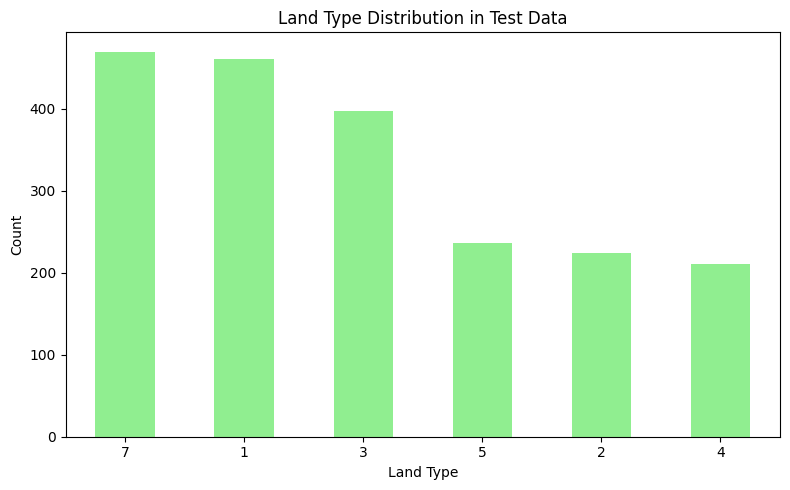

In [18]:
plt.figure(figsize=(8, 5))
landsat_test['land_type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Land Type Distribution in Test Data')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

#<u> Splitting Data into Train/Test

In [19]:
X_train = landsat_train.drop(columns=['land_type'])
X_test = landsat_test.drop(columns=['land_type'])

y_train = landsat_train[['land_type']]
y_test = landsat_test[['land_type']]

In [20]:
X_train.head()


,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra1,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87


#<u> Building the Pipeline

In [21]:
num_attribs = X_train.columns.tolist()

col_transform = ColumnTransformer([
    ('num', MinMaxScaler(), num_attribs),
], remainder='passthrough')

pipeline = Pipeline([
    ('col_transform', col_transform),
    ('random_forest_classifier', RandomForestClassifier(random_state=42))
])

#<u> Executing the Model

In [23]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_...
                                                   'middle_left_infra2',
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('random_forest_classifier',
                 RandomForestClassifier(random_state=42))])

#<u> Evaluating the Model

In [24]:
y_pred = pipeline.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.99      0.97      0.98       224
           3       0.89      0.95      0.92       397
           4       0.77      0.64      0.70       211
           5       0.92      0.91      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



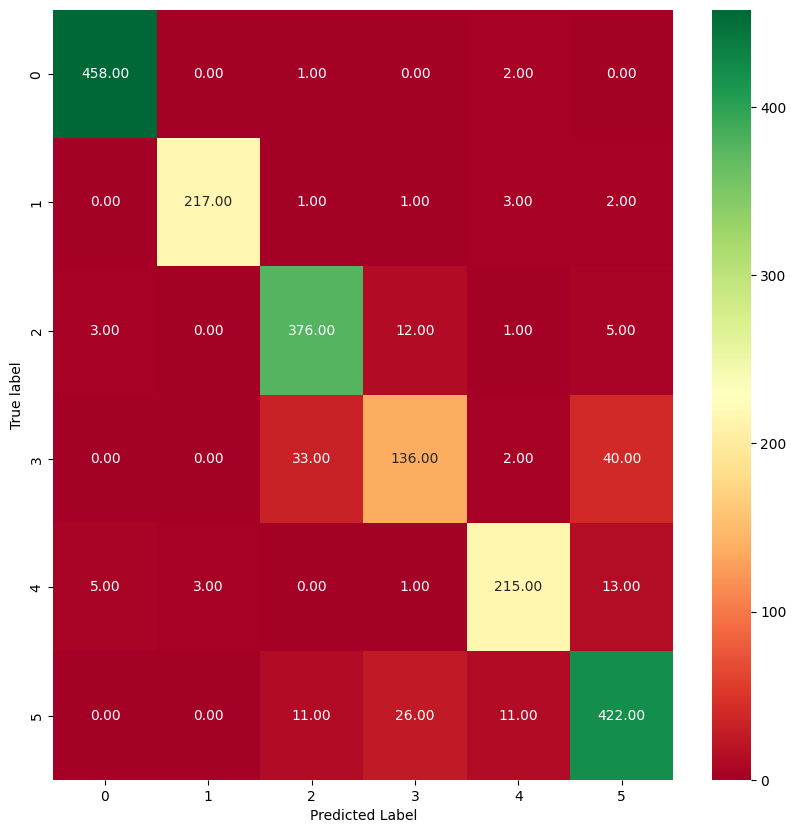

In [28]:
plot_cm(y_test, y_pred)

#<u> Conclusion

This model seemseffective when predicting the land type as we can see in the confusion matrix, the majority of the results were the correct predicitons. We can also see high scores in the classification report.

#<u> Problem 2

Implementing a Bagging Classifier

In [30]:
column_transform = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_attribs)
])

In [36]:
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

#<u> Building Pipeline

In [37]:
pipeline= Pipeline([
    ('column_transform', column_transform),
    ('bagging_clf', bagging_clf)
])

#<u> Running the Model

In [39]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_...
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('bagging_clf',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   n_estimators=50, random_state=42))])

#<u> Evaluating the Model

In [40]:
y_pred = pipeline.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       461
           2       0.98      0.97      0.98       224
           3       0.87      0.94      0.90       397
           4       0.74      0.61      0.67       211
           5       0.92      0.85      0.89       237
           7       0.87      0.90      0.89       470

    accuracy                           0.90      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.90      0.90      0.90      2000



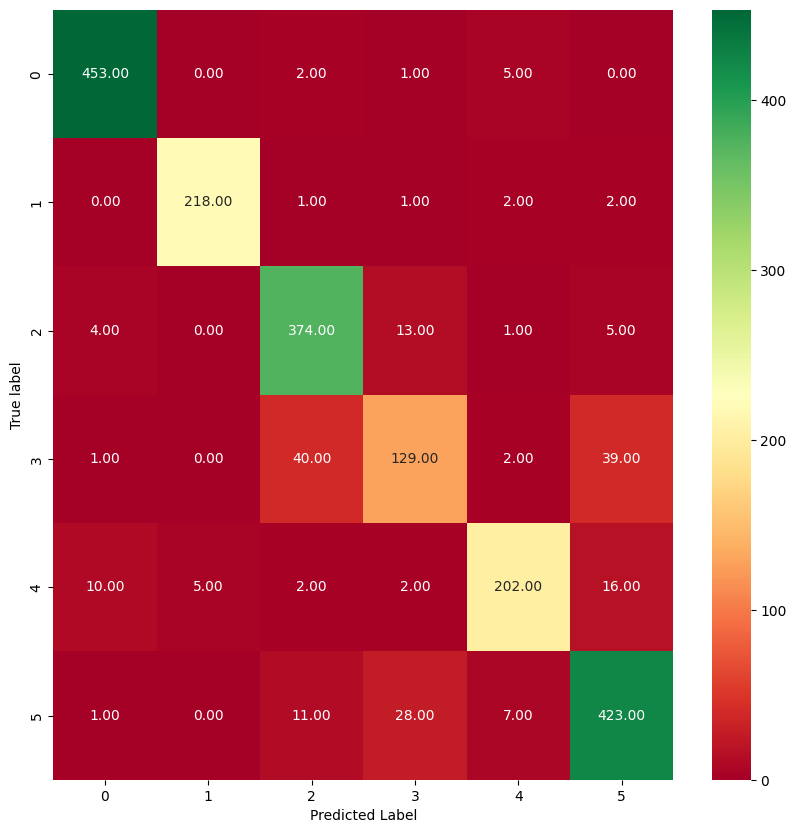

In [44]:
plot_cm(y_test, y_pred)

#<u> Conclusion

implementing a Bagging Classifier, we can see that the model is still effective in predicting the land type.

#<u> Problem 3

Using the banknote_authentivation data set, implement a RandomForest classifier int he same manner.

#<u> Aquire data

In [45]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

#<u> Splitting data into train and test

In [46]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [47]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
Y = df['forgery']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .20, random_state = 0)

#<u> Building a Pipeline

In [49]:
num_attribs = ['variance', 'skewness', 'curtosis', 'entropy']
cat_attribs = []

col_transform = ColumnTransformer(transformers = [
    ('num', MinMaxScaler(), num_attribs),
    ],remainder = 'passthrough')

In [50]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('random_forest_classifier', RandomForestClassifier(random_state=42))
])

#<u> Executing the Model

In [53]:
pipeline.fit(x_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('random_forest_classifier',
                 RandomForestClassifier(random_state=42))])

#<u>Evaluating the Model

In [54]:
y_pred = pipeline.predict(x_test)

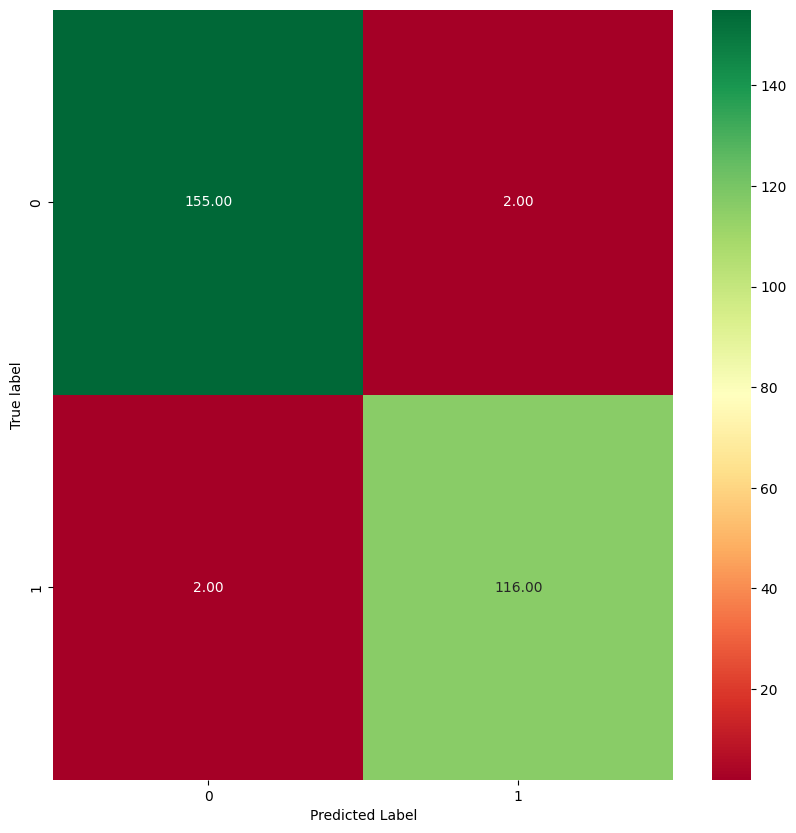

In [55]:
plot_cm(y_test, y_pred)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



#<u> Conclusion

This model has been effective in predicitng forgeries. We can see the high scores in the classification report and the high scores for the correct prediction in the confusion matrix.